In [996]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [997]:
data = pd.read_csv('cust_data1.csv')

In [998]:
# Explore the dataset
data.head()  # Print the first few rows of the dataset

,custid,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
0,6H6T6N,0,27/09/2008,10/08/2009,10/08/2009,29,100.000000,3.448276,14.52,0.000000,0,0,0,Monday,DEL
1,APCENR,1,18/12/2006,31/03/2007,18/01/2010,95,92.631579,10.526316,83.69,0.181641,1,1,1,Friday,DEL
2,7UP6MS,0,02/10/2006,30/11/2006,05/07/2007,0,0.000000,0.000000,33.58,0.059908,0,0,0,Wednesday,DEL
3,7ZEW8G,0,21/10/2006,27/03/2007,27/03/2007,0,0.000000,0.000000,54.96,0.000000,0,0,0,Thursday,BOM
4,8V726M,1,26/11/2006,28/11/2006,27/01/2009,30,90.000000,13.333333,111.91,0.008850,0,0,0,Monday,BOM


In [999]:
print(data.shape) # Print the number of rows and columns in the dataset

(30801, 15)


In [1000]:
data.info()  # Print the summary information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30801 entries, 0 to 30800
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   custid      30781 non-null  object 
 1   retained    30801 non-null  int64  
 2   created     30781 non-null  object 
 3   firstorder  30781 non-null  object 
 4   lastorder   30781 non-null  object 
 5   esent       30801 non-null  int64  
 6   eopenrate   30801 non-null  float64
 7   eclickrate  30801 non-null  float64
 8   avgorder    30801 non-null  float64
 9   ordfreq     30801 non-null  float64
 10  paperless   30801 non-null  int64  
 11  refill      30801 non-null  int64  
 12  doorstep    30801 non-null  int64  
 13  favday      30801 non-null  object 
 14  city        30801 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 3.5+ MB


In [1001]:
missing_values = data.isnull().sum() #check for missing values

print(missing_values)

custid        20
retained       0
created       20
firstorder    20
lastorder     20
esent          0
eopenrate      0
eclickrate     0
avgorder       0
ordfreq        0
paperless      0
refill         0
doorstep       0
favday         0
city           0
dtype: int64


In [1002]:
#Use backward fill to replace missing values
data.fillna(method='bfill',inplace=True) 

In [1003]:
# Verify the changes
print(data.isnull().sum())

custid        0
retained      0
created       0
firstorder    0
lastorder     0
esent         0
eopenrate     0
eclickrate    0
avgorder      0
ordfreq       0
paperless     0
refill        0
doorstep      0
favday        0
city          0
dtype: int64


In [1004]:
# Convert date columns to datetime data type with specified format
data['created'] = pd.to_datetime(data['created'], format='%d/%m/%Y')
data['firstorder'] = pd.to_datetime(data['firstorder'], format='%d/%m/%Y', errors='coerce')
data['lastorder'] = pd.to_datetime(data['lastorder'], format='%d/%m/%Y', errors='coerce')


In [1005]:
# Convert date columns to numeric representation (e.g., number of days)
data['created_numeric'] = (data['created'] - pd.to_datetime('1900-01-01')).dt.days
data['firstorder_numeric'] = (data['firstorder'] - pd.to_datetime('1900-01-01')).dt.days
data['lastorder_numeric'] = (data['lastorder'] - pd.to_datetime('1900-01-01')).dt.days

# Verify the changes
print(data[['created', 'firstorder', 'lastorder', 'created_numeric', 'firstorder_numeric', 'lastorder_numeric']])

         created firstorder  lastorder  created_numeric  firstorder_numeric  \
0     2008-09-27 2009-08-10 2009-08-10            39716             40033.0   
1     2006-12-18 2007-03-31 2010-01-18            39067             39170.0   
2     2006-10-02 2006-11-30 2007-07-05            38990             39049.0   
3     2006-10-21 2007-03-27 2007-03-27            39009             39166.0   
4     2006-11-26 2006-11-28 2009-01-27            39045             39047.0   
...          ...        ...        ...              ...                 ...   
30796 2014-01-16 2014-01-16 2014-01-16            41653             41653.0   
30797 2014-01-16 2014-01-16 2014-01-16            41653             41653.0   
30798 2014-01-16 2014-01-16 2014-01-20            41653             41653.0   
30799 2014-01-16 2014-01-16 2014-01-16            41653             41653.0   
30800 2014-01-16 2014-01-16 2014-01-16            41653             41653.0   

       lastorder_numeric  
0                40033.0

In [1006]:
# Drop the original date columns
data.drop(columns=['created', 'firstorder', 'lastorder'], inplace=True)

# Rename the numeric columns to match the original date columns' names
data.rename(columns={
    'created_numeric': 'created',
    'firstorder_numeric': 'firstorder',
    'lastorder_numeric': 'lastorder'
}, inplace=True)

# Print the first few rows of the DataFrame to verify the changes
print(data.head())


   custid  retained  esent   eopenrate  eclickrate  avgorder   ordfreq  \
0  6H6T6N         0     29  100.000000    3.448276     14.52  0.000000   
1  APCENR         1     95   92.631579   10.526316     83.69  0.181641   
2  7UP6MS         0      0    0.000000    0.000000     33.58  0.059908   
3  7ZEW8G         0      0    0.000000    0.000000     54.96  0.000000   
4  8V726M         1     30   90.000000   13.333333    111.91  0.008850   

   paperless  refill  doorstep     favday city  created  firstorder  lastorder  
0          0       0         0     Monday  DEL    39716     40033.0    40033.0  
1          1       1         1     Friday  DEL    39067     39170.0    40194.0  
2          0       0         0  Wednesday  DEL    38990     39049.0    39266.0  
3          0       0         0   Thursday  BOM    39009     39166.0    39166.0  
4          0       0         0     Monday  BOM    39045     39047.0    39838.0  


In [1007]:
#drop custid column

# List of columns to drop
columns_to_drop = ['custid']

# Drop the specified columns from the original DataFrame
data.drop(columns=columns_to_drop, inplace=True)

# Display the DataFrame after dropping the columns
print(data)

       retained  esent   eopenrate  eclickrate  avgorder   ordfreq  paperless  \
0             0     29  100.000000    3.448276     14.52  0.000000          0   
1             1     95   92.631579   10.526316     83.69  0.181641          1   
2             0      0    0.000000    0.000000     33.58  0.059908          0   
3             0      0    0.000000    0.000000     54.96  0.000000          0   
4             1     30   90.000000   13.333333    111.91  0.008850          0   
...         ...    ...         ...         ...       ...       ...        ...   
30796         1      6   83.333333   16.666667     55.68  0.000000          1   
30797         1     13   69.230769    7.692308     35.00  0.000000          1   
30798         1      8   75.000000   37.500000     52.03  0.500000          1   
30799         1      6   33.333333    0.000000     40.20  0.000000          1   
30800         1      5   40.000000   20.000000     40.00  0.000000          1   

       refill  doorstep    

# OUTLIER DETECTION AND WINSORIZATION

In [1008]:
#Outlier detection using IQR Method
numeric_columns = ['esent', 'eopenrate', 'eclickrate', 'avgorder', 'ordfreq']
# Calculate the first quartile (Q1) and third quartile (Q3) for each numeric column
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)

# Calculate the Interquartile Range (IQR) for each numeric column
IQR = Q3 - Q1

In [1009]:
# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers for each numeric column
outlier_mask = (data[numeric_columns] < lower_bound) | (data[numeric_columns] > upper_bound)

In [1010]:
# Get the rows containing outliers
outlier_rows = data[outlier_mask.any(axis=1)]

# Display the rows with outliers
print(outlier_rows[numeric_columns])

       esent   eopenrate  eclickrate  avgorder   ordfreq
0         29  100.000000    3.448276     14.52  0.000000
1         95   92.631579   10.526316     83.69  0.181641
5         46   80.434783   15.217391    175.10  0.141176
6         60   43.333333    6.666667    116.55  0.125000
9         34   94.117647    8.823529     66.07  0.133789
...      ...         ...         ...       ...       ...
30788      6  100.000000   33.333333     40.20  0.000000
30792      7   85.714286   28.571429     41.47  0.000000
30795      5   80.000000   20.000000     74.92  0.000000
30798      8   75.000000   37.500000     52.03  0.500000
30800      5   40.000000   20.000000     40.00  0.000000

[7886 rows x 5 columns]


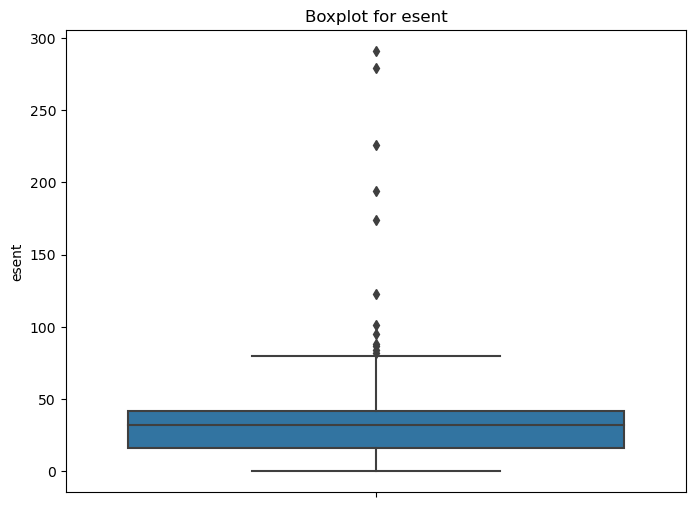

In [1011]:
#BOXPLOTS TO VISUALISE OUTLIERS
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for the "esent" column
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='esent')
plt.title('Boxplot for esent')
plt.ylabel('esent')
plt.show()


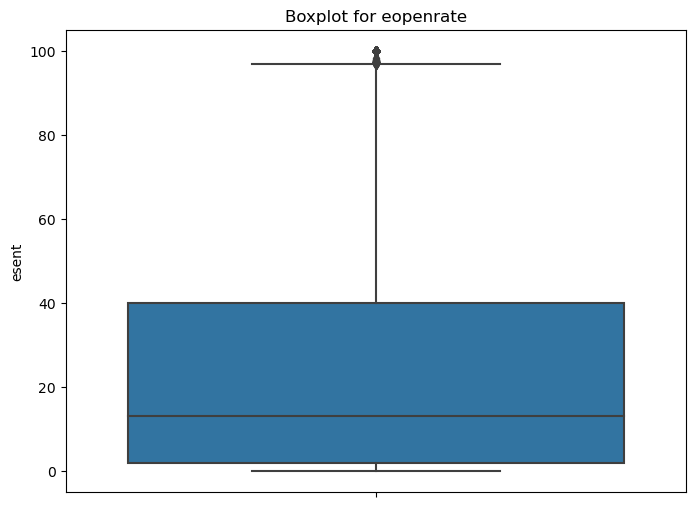

In [1012]:

# Create a boxplot for the "eopenrate" column
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='eopenrate')
plt.title('Boxplot for eopenrate')
plt.ylabel('esent')
plt.show()


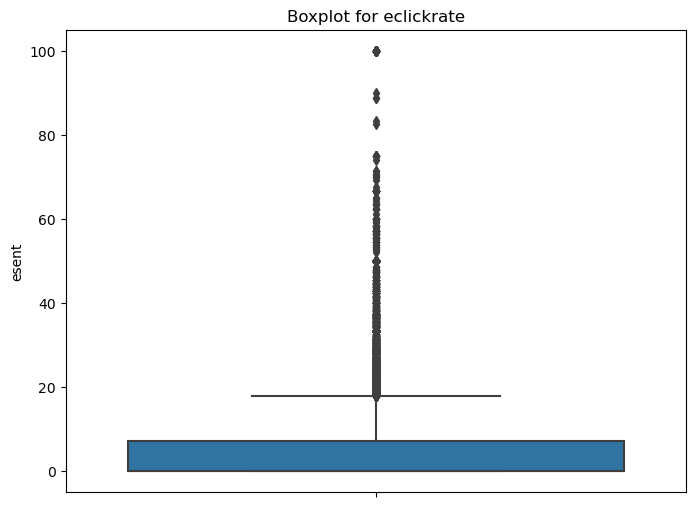

In [1013]:
# Create a boxplot for the "eclickrate" column
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='eclickrate')
plt.title('Boxplot for eclickrate')
plt.ylabel('esent')
plt.show()


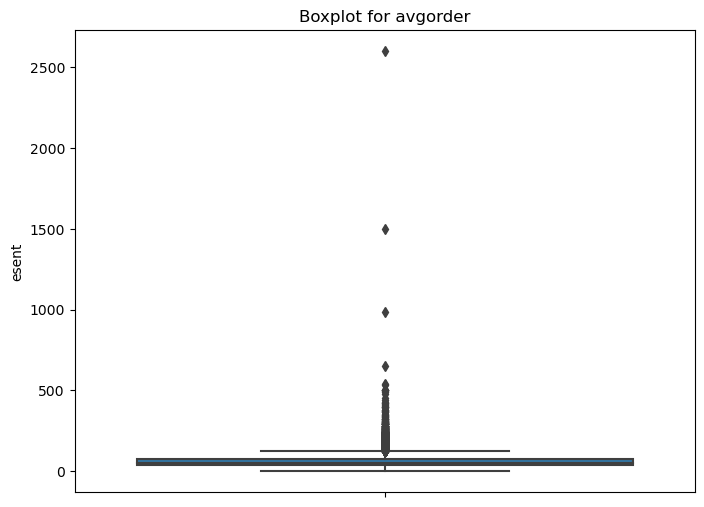

In [1014]:
# Create a boxplot for the "avgorder" column
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='avgorder')
plt.title('Boxplot for avgorder')
plt.ylabel('esent')
plt.show()


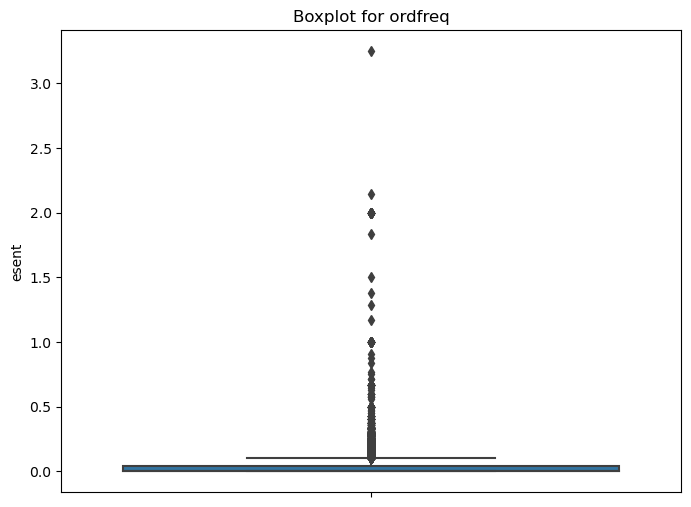

In [1015]:
# Create a boxplot for the "ordfreq" column
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='ordfreq')
plt.title('Boxplot for ordfreq')
plt.ylabel('esent')
plt.show()



In [1016]:
#WINSORIZATION
from scipy.stats.mstats import winsorize

# Apply winsorization to each numeric column
for column in numeric_columns:
    data[column] = winsorize(data[column], limits=[0.02, 0.02])

# Verify the changes
print(data[numeric_columns])


       esent   eopenrate  eclickrate  avgorder   ordfreq
0         29  100.000000    3.448276     19.45  0.000000
1         53   92.631579   10.526316     83.69  0.181641
2          0    0.000000    0.000000     33.58  0.059908
3          0    0.000000    0.000000     54.96  0.000000
4         30   90.000000   13.333333    111.91  0.008850
...      ...         ...         ...       ...       ...
30796      6   83.333333   16.666667     55.68  0.000000
30797     13   69.230769    7.692308     35.00  0.000000
30798      8   75.000000   37.500000     52.03  0.285714
30799      6   33.333333    0.000000     40.20  0.000000
30800      5   40.000000   20.000000     40.00  0.000000

[30801 rows x 5 columns]


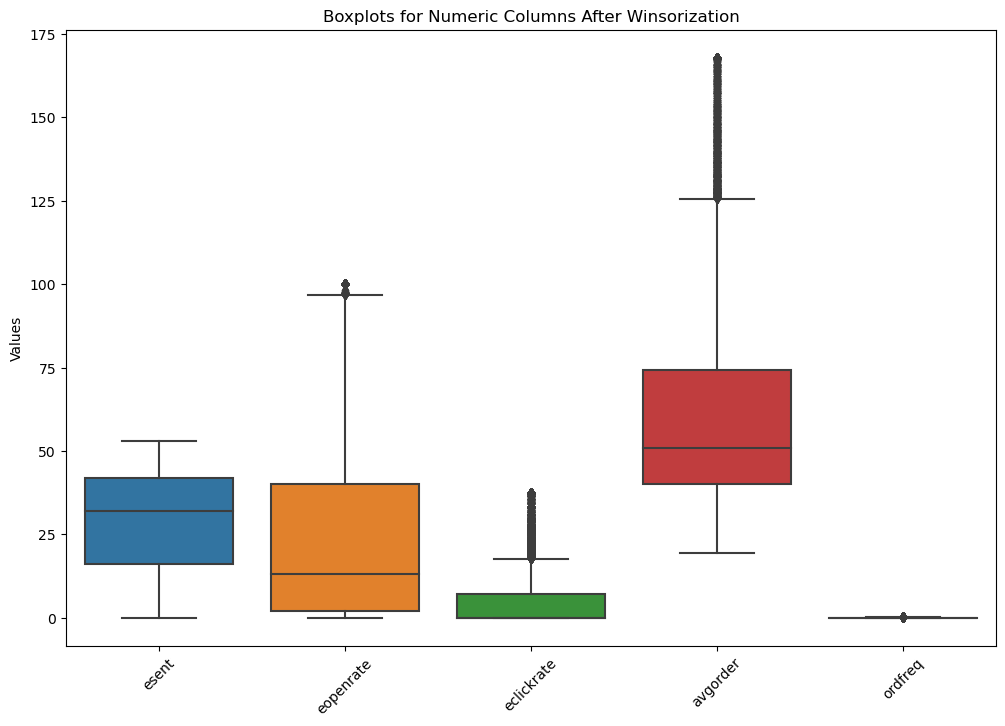

In [1017]:
# Create a boxplot for all numeric columns after winsorization
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numeric_columns], orient='v')
plt.title('Boxplots for Numeric Columns After Winsorization')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


In [1018]:
#Unique Count for City
summary_stats = data['city'].describe()
print(summary_stats)


count     30801
unique        4
top         BOM
freq      11566
Name: city, dtype: object


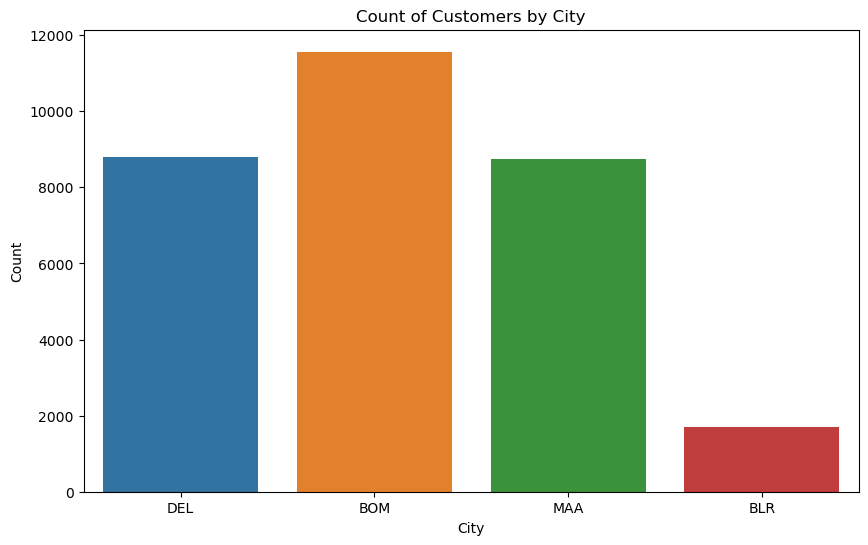

In [1019]:
#Count Plot
#count occurence in city
plt.figure(figsize=(10, 6))
sns.countplot(x='city', data=data)
plt.title('Count of Customers by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

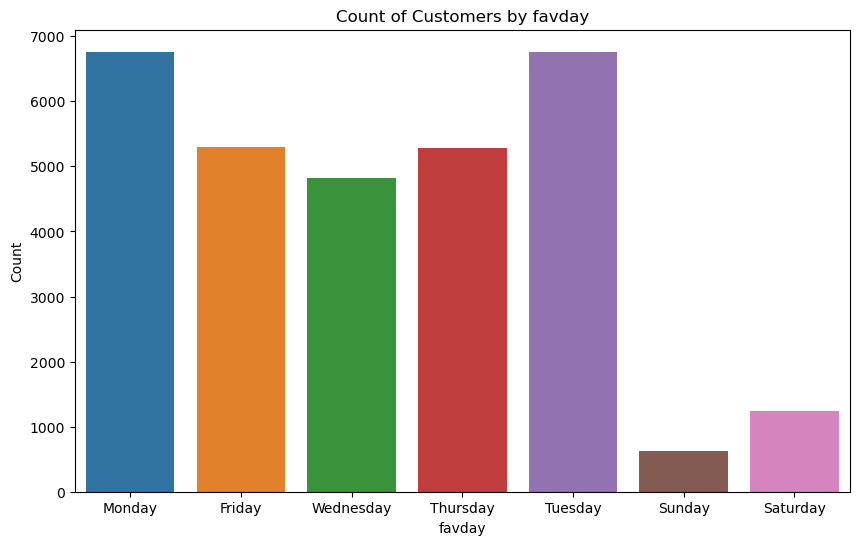

In [1020]:
#Count Plot
#count occurence in favday
plt.figure(figsize=(10, 6))
sns.countplot(x='favday', data=data)
plt.title('Count of Customers by favday')
plt.xlabel('favday')
plt.ylabel('Count')
plt.show()

In [1021]:
#Unique Count for favday
summary_stats = data['favday'].describe()
print(summary_stats)

count      30801
unique         7
top       Monday
freq        6762
Name: favday, dtype: object


In [1025]:
summary_stats = data.describe()
print(summary_stats)


C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\function_base.py:4737: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

           retained         esent     eopenrate    eclickrate      avgorder  \
count  30801.000000  30801.000000  30801.000000  30801.000000  30801.000000   
mean       0.794520     28.013636     25.554838      5.301056     60.836418   
std        0.404059     16.357442     29.557106      8.542972     31.723006   
min        0.000000      0.000000      0.000000      0.000000     19.450000   
25%        1.000000     16.000000      2.040816      0.000000     40.020000   
50%        1.000000     32.000000     13.207547      0.000000     50.970000   
75%        1.000000     42.000000     40.000000      7.142857     74.280000   
max        1.000000     53.000000    100.000000     37.500000    167.840000   

            ordfreq     paperless        refill      doorstep       created  \
count  30801.000000  30801.000000  30801.000000  30801.000000  30801.000000   
mean       0.033250      0.649037      0.095094      0.038895  40095.740106   
std        0.063010      0.477279      0.293350    

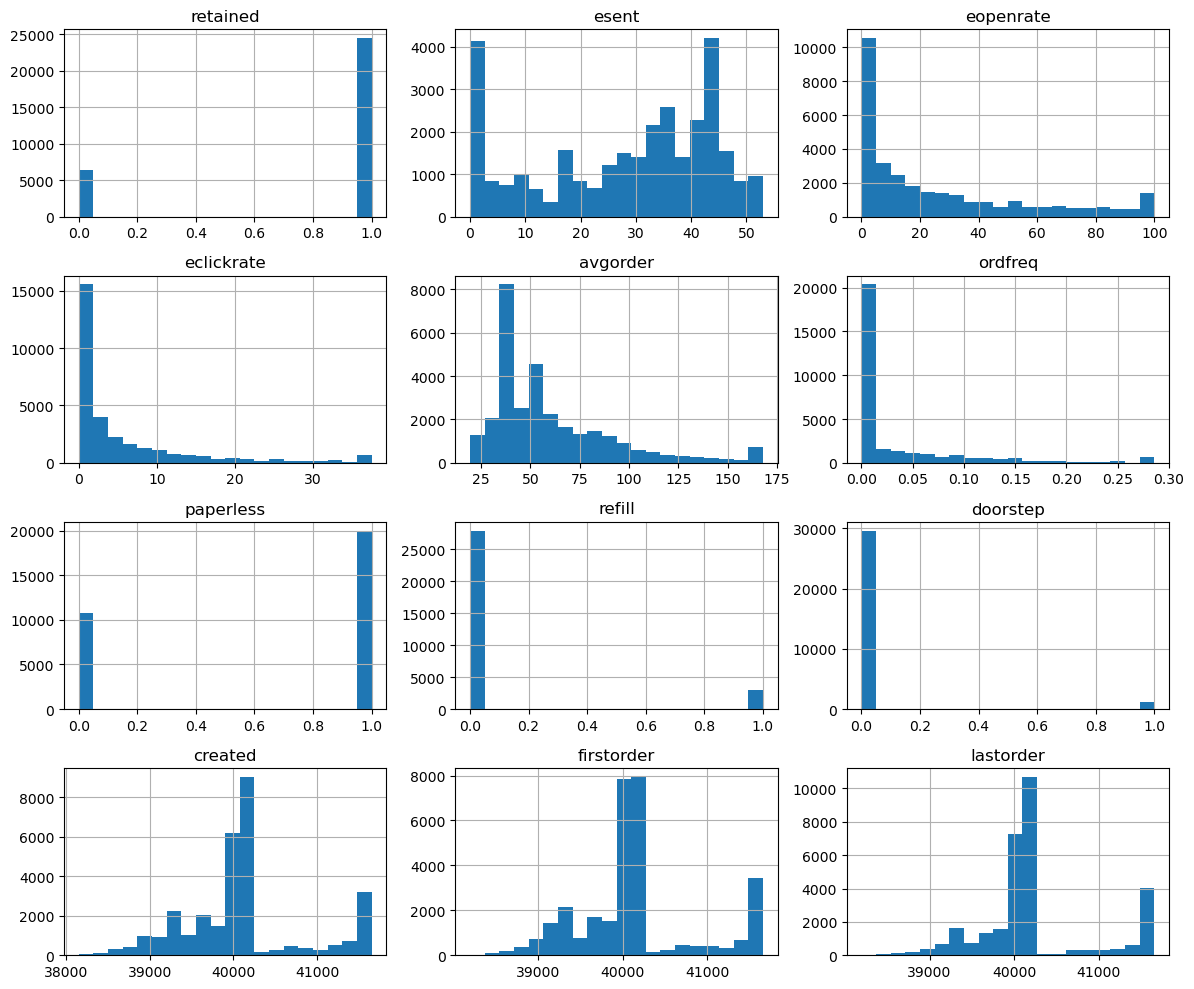

In [1026]:
#Distribution of numerical variables
import matplotlib.pyplot as plt

data.hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()


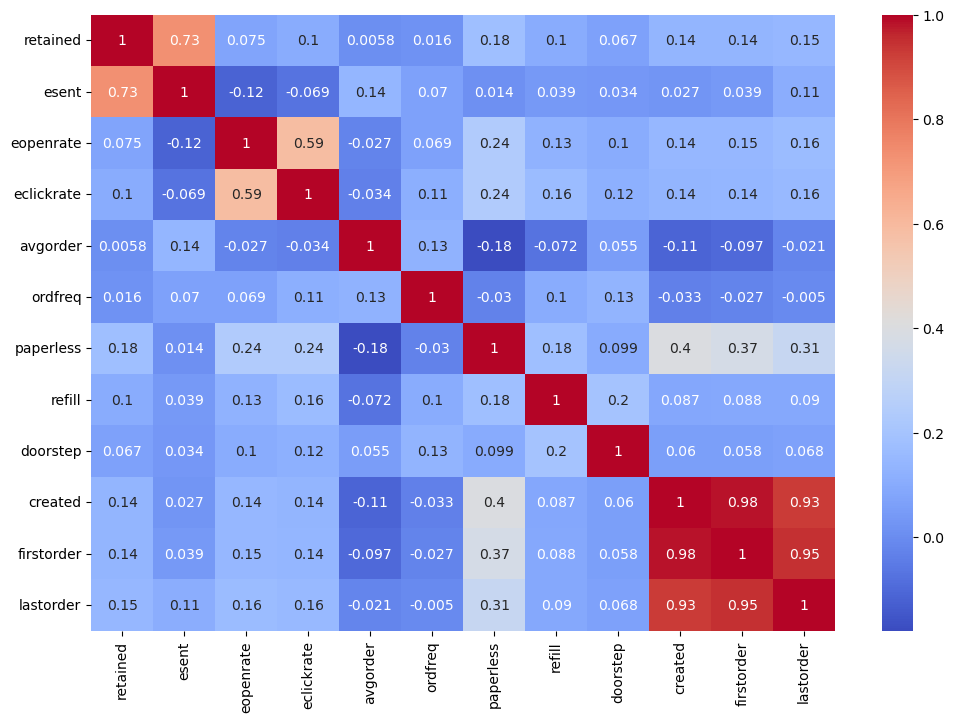

In [1027]:
#Correlation and heatmap
correlation_matrix = data.corr()
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


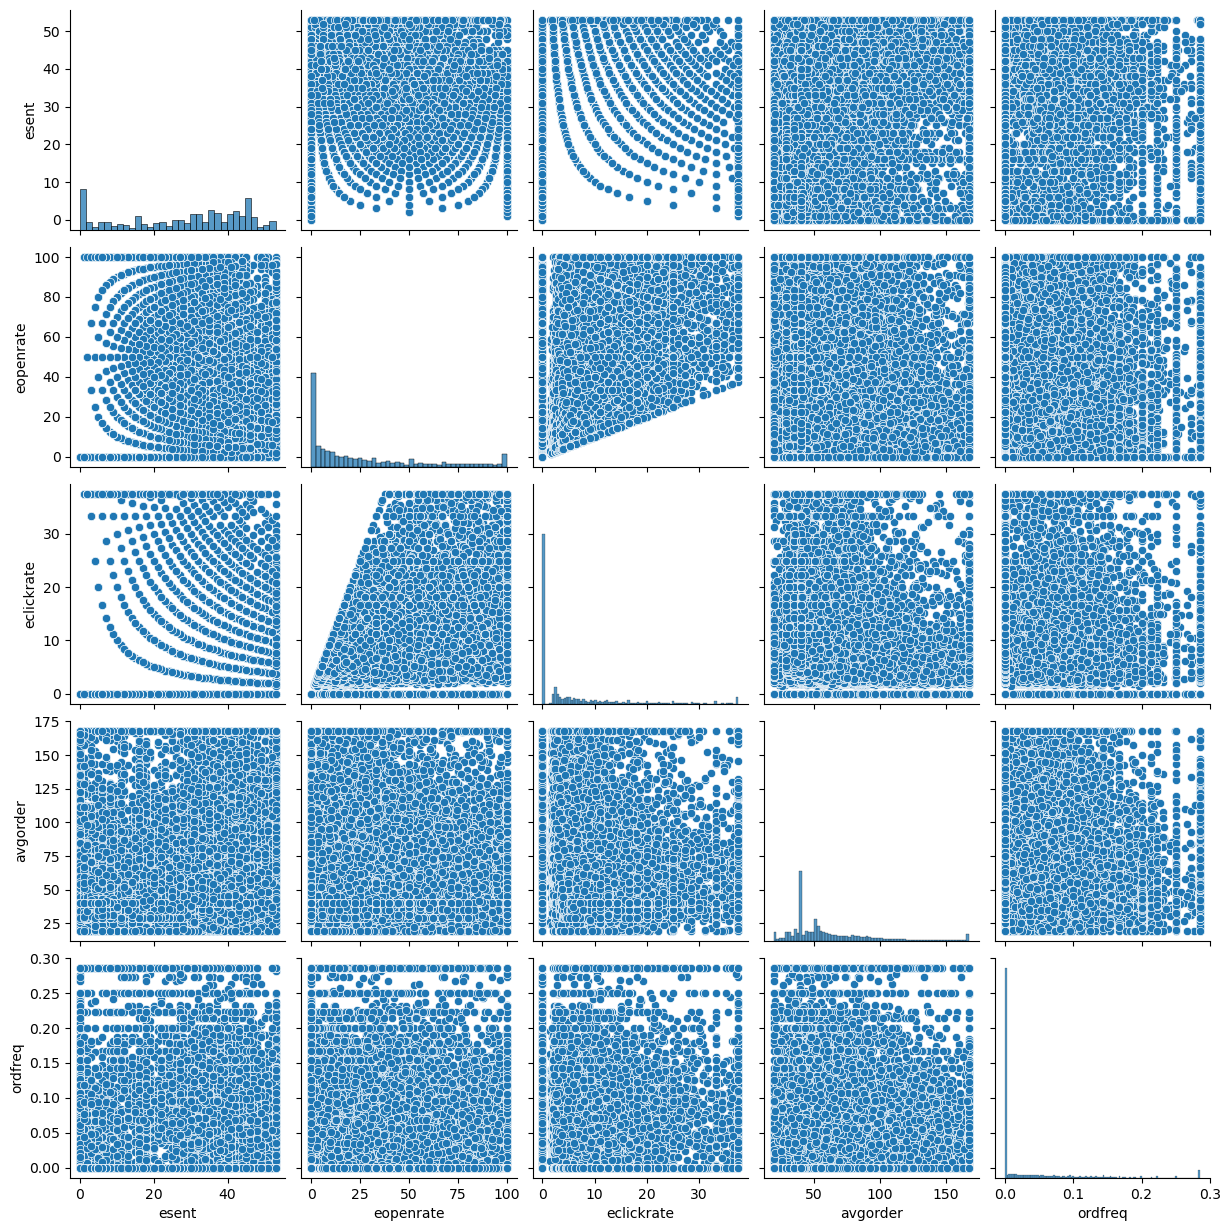

In [1028]:
#Pairplots
sns.pairplot(data, vars=['esent', 'eopenrate', 'eclickrate', 'avgorder', 'ordfreq'])
plt.show()


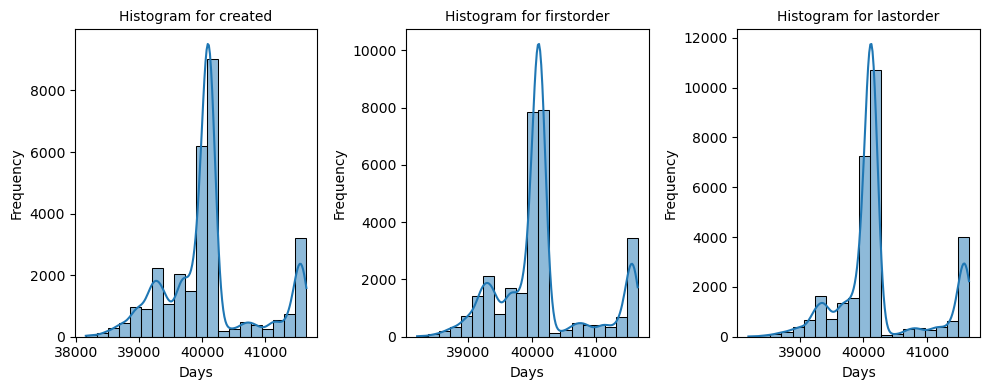

In [1030]:
date_numeric_columns = ['created', 'firstorder', 'lastorder']

# Create histograms for date numeric columns
plt.figure(figsize=(10, 4))
for i, column in enumerate(date_numeric_columns, 1):
    plt.subplot(1, len(date_numeric_columns), i)
    sns.histplot(data[column], bins=20, kde=True)
    plt.title(f'Histogram for {column}', fontsize=10)
    plt.xlabel('Days', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.show()

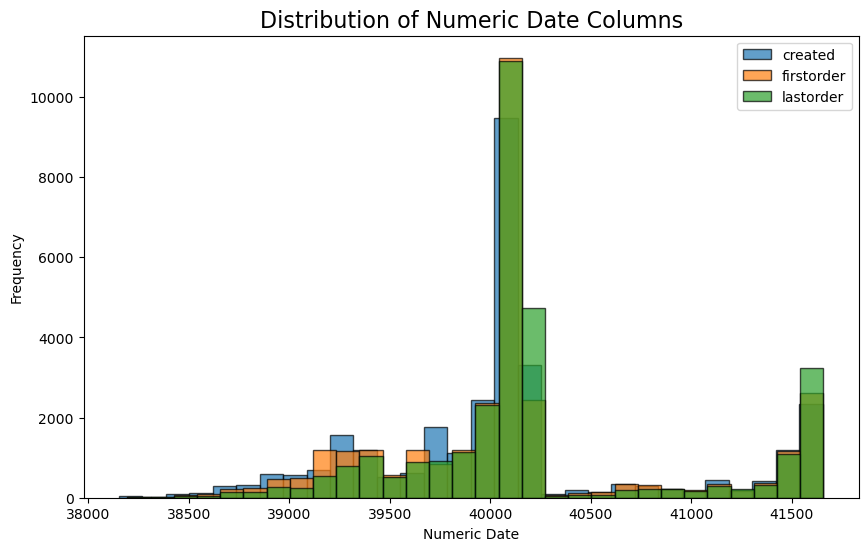

In [1031]:
# Histograms to visualize the distribution of numeric date columns
plt.figure(figsize=(10, 6))
plt.hist(data['created'], bins=30, edgecolor='black', alpha=0.7, label='created')
plt.hist(data['firstorder'], bins=30, edgecolor='black', alpha=0.7, label='firstorder')
plt.hist(data['lastorder'], bins=30, edgecolor='black', alpha=0.7, label='lastorder')
plt.title('Distribution of Numeric Date Columns', fontsize=16)
plt.xlabel('Numeric Date', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.legend()
plt.show()

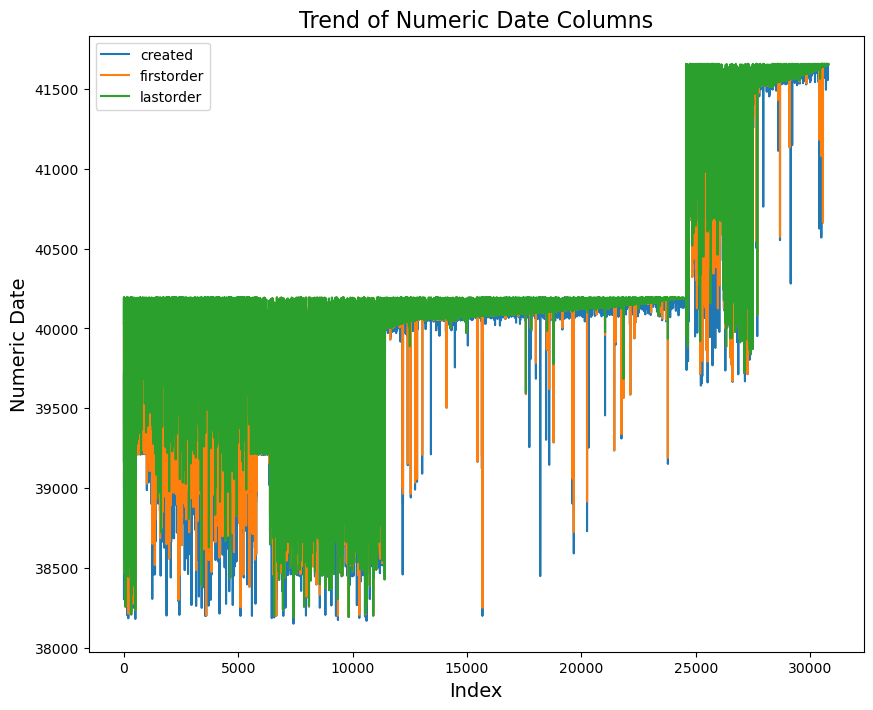

In [1032]:
# Line plot to visualize the trend of numeric date columns over time
plt.figure(figsize=(10, 8))
plt.plot(data['created'], label='created')
plt.plot(data['firstorder'], label='firstorder')
plt.plot(data['lastorder'], label='lastorder')
plt.title('Trend of Numeric Date Columns', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Numeric Date', fontsize=14)
plt.legend()
plt.show()

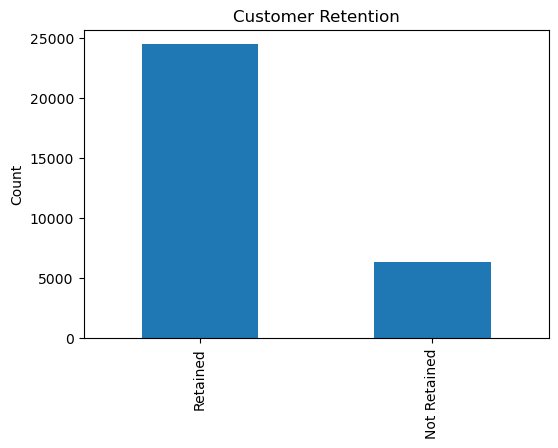

In [1035]:
#Distribution of retained and non-retained customers
plt.figure(figsize=(6, 4))
data['retained'].value_counts().plot(kind='bar')
plt.title('Customer Retention')
plt.xticks([0, 1], ['Retained', 'Not Retained'])
plt.ylabel('Count')
plt.show()


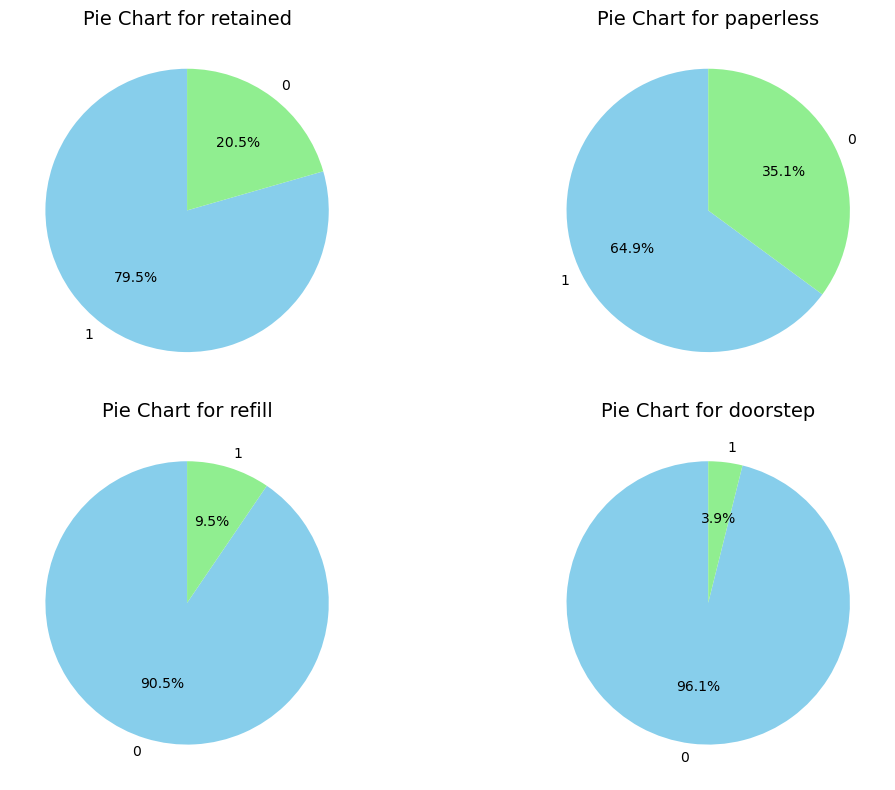

In [1036]:
# Create pie charts for binary variables
binary_columns = ['retained', 'paperless', 'refill', 'doorstep']

plt.figure(figsize=(12, 8))
for i, column in enumerate(binary_columns, 1):
    plt.subplot(2, 2, i)
    data[column].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=90)
    plt.title(f'Pie Chart for {column}', fontsize=14)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [1037]:
#ONE HOT ENCODING AND FREQUENCY ENCODING

# One-hot encode 'favday'
favday_encoded = pd.get_dummies(data['favday'], prefix='favday')

In [1038]:
# Frequency encode 'city'
city_frequency = data['city'].value_counts(normalize=True)
data['city_encoded'] = data['city'].map(city_frequency)

In [1039]:
# Drop the original categorical columns
data.drop(['favday', 'city'], axis=1, inplace=True)

In [1040]:
# Concatenate the encoded columns back to the DataFrame
data_encoded = pd.concat([data, favday_encoded], axis=1)

# Verify the changes
print(data_encoded.head())

   retained  esent   eopenrate  eclickrate  avgorder   ordfreq  paperless  \
0         0     29  100.000000    3.448276     19.45  0.000000          0   
1         1     53   92.631579   10.526316     83.69  0.181641          1   
2         0      0    0.000000    0.000000     33.58  0.059908          0   
3         0      0    0.000000    0.000000     54.96  0.000000          0   
4         1     30   90.000000   13.333333    111.91  0.008850          0   

   refill  doorstep  created  firstorder  lastorder  city_encoded  \
0       0         0    39716     40033.0    40033.0      0.285348   
1       1         1    39067     39170.0    40194.0      0.285348   
2       0         0    38990     39049.0    39266.0      0.285348   
3       0         0    39009     39166.0    39166.0      0.375507   
4       0         0    39045     39047.0    39838.0      0.375507   

   favday_Friday  favday_Monday  favday_Saturday  favday_Sunday  \
0              0              1                0       

In [1041]:
print(data_encoded)

       retained  esent   eopenrate  eclickrate  avgorder   ordfreq  paperless  \
0             0     29  100.000000    3.448276     19.45  0.000000          0   
1             1     53   92.631579   10.526316     83.69  0.181641          1   
2             0      0    0.000000    0.000000     33.58  0.059908          0   
3             0      0    0.000000    0.000000     54.96  0.000000          0   
4             1     30   90.000000   13.333333    111.91  0.008850          0   
...         ...    ...         ...         ...       ...       ...        ...   
30796         1      6   83.333333   16.666667     55.68  0.000000          1   
30797         1     13   69.230769    7.692308     35.00  0.000000          1   
30798         1      8   75.000000   37.500000     52.03  0.285714          1   
30799         1      6   33.333333    0.000000     40.20  0.000000          1   
30800         1      5   40.000000   20.000000     40.00  0.000000          1   

       refill  doorstep  cr

In [1042]:
#Rename Dataset
data11 = data_encoded

In [1043]:
# Assuming data2 is your DataFrame
data11.to_csv('data11.csv', index=False)


In [1044]:
data3 = pd.read_csv('data11.csv')

# DATA SPLITTING

In [1045]:
# 'data3' is the DataFrame

# Split the data into features (X) and target variable (y)
X = data3.drop(columns=['retained'])
y = data3['retained']

# Verify the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (30801, 19)
Shape of y: (30801,)


In [1046]:
# Display X (feature matrix) and y (target vector)
print("Feature Matrix (X):")
print(X.head())

print("\nTarget Vector (y):")
print(y.head())


Feature Matrix (X):
   esent   eopenrate  eclickrate  avgorder   ordfreq  paperless  refill  \
0     29  100.000000    3.448276     19.45  0.000000          0       0   
1     53   92.631579   10.526316     83.69  0.181641          1       1   
2      0    0.000000    0.000000     33.58  0.059908          0       0   
3      0    0.000000    0.000000     54.96  0.000000          0       0   
4     30   90.000000   13.333333    111.91  0.008850          0       0   

   doorstep  created  firstorder  lastorder  city_encoded  favday_Friday  \
0         0    39716     40033.0    40033.0      0.285348              0   
1         1    39067     39170.0    40194.0      0.285348              1   
2         0    38990     39049.0    39266.0      0.285348              0   
3         0    39009     39166.0    39166.0      0.375507              0   
4         0    39045     39047.0    39838.0      0.375507              0   

   favday_Monday  favday_Saturday  favday_Sunday  favday_Thursday  \
0  

In [1047]:
#TRAIN-TEST SPLIT
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (24640, 19)
Shape of X_test: (6161, 19)
Shape of y_train: (24640,)
Shape of y_test: (6161,)


# SCALING USING MINMAX SCALER

In [1048]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the training data
X_train_normalized = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_normalized = scaler.transform(X_test)



In [1049]:
print("Shape of X_train_normalized:", X_train_normalized.shape)
print("Shape of X_test_normalized:", X_test_normalized.shape)


Shape of X_train_normalized: (24640, 19)
Shape of X_test_normalized: (6161, 19)


In [1050]:
# target variable 'y_train' and 'y_test' after splitting the data

# Check the distribution of classes in the training set
class_distribution_train = y_train.value_counts()

# Check the distribution of classes in the test set
class_distribution_test = y_test.value_counts()

# Display the class distribution for training and test sets
print("Class distribution in the training set:")
print(class_distribution_train)

print("\nClass distribution in the test set:")
print(class_distribution_test)


Class distribution in the training set:
1    19646
0     4994
Name: retained, dtype: int64

Class distribution in the test set:
1    4826
0    1335
Name: retained, dtype: int64


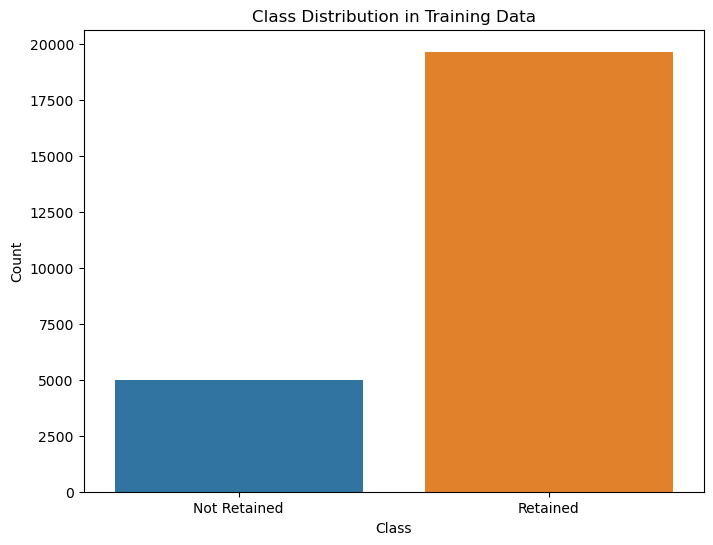

Class Percentages:
 1    79.732143
0    20.267857
Name: retained, dtype: float64


In [1051]:
###CLASS IMBALNCE

# Count the occurrences of each class
class_counts = y_train.value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Retained', 'Retained'])
plt.show()

# Calculate the percentage of each class
class_percentages = class_counts / len(y_train) * 100
print("Class Percentages:\n", class_percentages)


In [1052]:
pip install imbalanced-learn


In [1053]:
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler

# Initialize the SMOTE-Tomek instance
smote_tomek = SMOTETomek(random_state=42)

In [1054]:
# Resample the training data
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train_normalized, y_train)

print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)



Shape of X_train_resampled: (38960, 19)
Shape of y_train_resampled: (38960,)


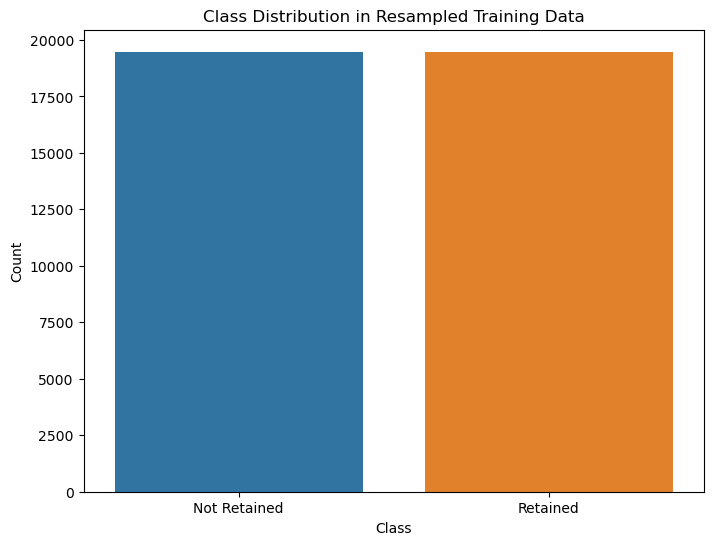

Class Percentages after Balancing:
 0    50.0
1    50.0
Name: retained, dtype: float64


In [1055]:
# Count the occurrences of each class in the resampled data
resampled_class_counts = y_train_resampled.value_counts()

# Plot the class distribution after balancing
plt.figure(figsize=(8, 6))
sns.barplot(x=resampled_class_counts.index, y=resampled_class_counts.values)
plt.title('Class Distribution in Resampled Training Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Retained', 'Retained'])
plt.show()

# Calculate the percentage of each class after balancing
resampled_class_percentages = resampled_class_counts / len(y_train_resampled) * 100
print("Class Percentages after Balancing:\n", resampled_class_percentages)

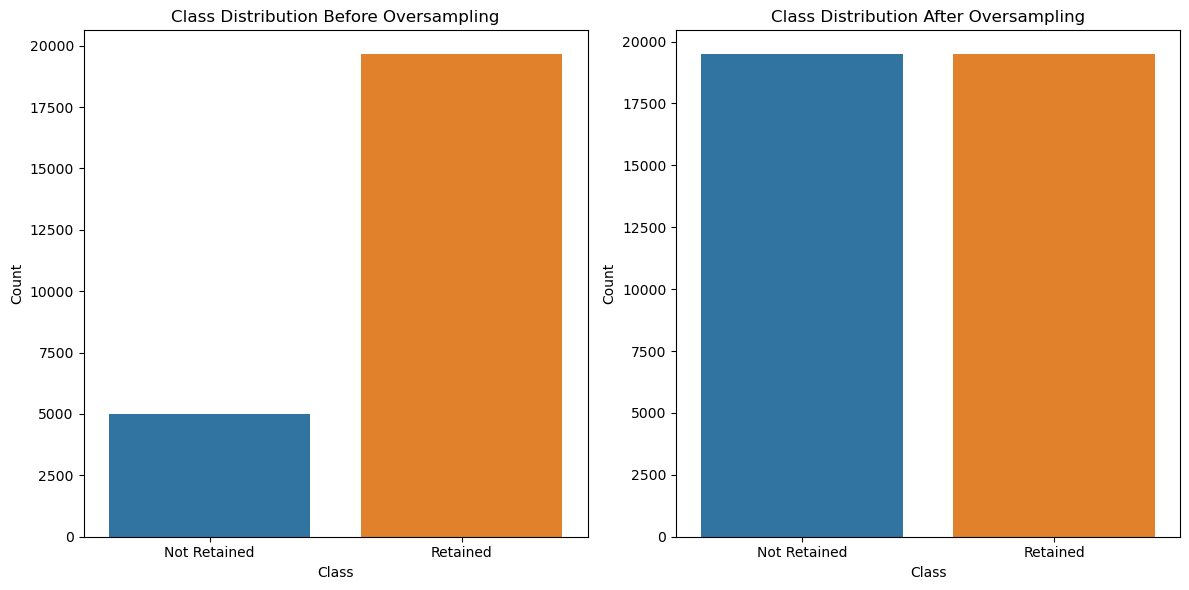

In [1056]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the class_counts and resampled_class_counts calculated

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot class distribution before oversampling
sns.barplot(x=class_counts.index, y=class_counts.values, ax=axes[0])
axes[0].set_title('Class Distribution Before Oversampling')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Not Retained', 'Retained'])

# Plot class distribution after oversampling
sns.barplot(x=resampled_class_counts.index, y=resampled_class_counts.values, ax=axes[1])
axes[1].set_title('Class Distribution After Oversampling')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Not Retained', 'Retained'])

# Adjust layout
plt.tight_layout()
plt.show()


# FEATURE SELECTION

In [1057]:
# Print the shape of x_train_resampled
print("Shape of x_train_resampled:", X_train_resampled.shape)

# Print the shape of X_test
print("Shape of X_normalized:", X_test_normalized.shape)

# Print the shape of y_train_resampled
print("Shape of y_train_resampled:", y_train_resampled.shape)

# Print the shape of y_test
print("Shape of y_test:", y_test.shape)


Shape of x_train_resampled: (38960, 19)
Shape of X_normalized: (6161, 19)
Shape of y_train_resampled: (38960,)
Shape of y_test: (6161,)


In [1058]:
#Rename the train and test sets
# Renaming the variables
X_train = X_train_resampled
X_test = X_test_normalized
Y_train = y_train_resampled
Y_test = y_test


In [1059]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### correlation

In [1060]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1061]:
column_names = [
    'esent', 'eopenrate', 'eclickrate', 'avgorder', 'ordfreq',
    'paperless', 'refill', 'doorstep', 'created', 'firstorder',
    'lastorder', 'city_encoded', 'favday_Friday', 'favday_Monday',
    'favday_Saturday', 'favday_Sunday', 'favday_Thursday',
    'favday_Tuesday', 'favday_Wednesday'
]


In [1062]:
# Create a DataFrame with both features and target variable
data = np.concatenate((X_train, Y_train.values.reshape(-1, 1)), axis=1)
data_df = pd.DataFrame(data, columns=column_names + ['retained'])

In [1063]:
# Calculate the correlation matrix
correlation_matrix = data_df.corr()

In [1064]:
print(correlation_matrix)

                     esent  eopenrate  eclickrate  avgorder   ordfreq  \
esent             1.000000   0.022626    0.047363  0.095695  0.064239   
eopenrate         0.022626   1.000000    0.592358 -0.059346  0.010910   
eclickrate        0.047363   0.592358    1.000000 -0.041584  0.058621   
avgorder          0.095695  -0.059346   -0.041584  1.000000  0.129029   
ordfreq           0.064239   0.010910    0.058621  0.129029  1.000000   
paperless         0.166683   0.314070    0.262484 -0.144979 -0.053867   
refill            0.115786   0.144044    0.164309 -0.061855  0.094523   
doorstep          0.097931   0.095482    0.110725  0.052857  0.122380   
created           0.129713   0.207780    0.177763 -0.102918 -0.051335   
firstorder        0.137387   0.206149    0.181281 -0.086880 -0.040336   
lastorder         0.181665   0.212780    0.186334 -0.012768 -0.017765   
city_encoded     -0.023386  -0.068691   -0.092925 -0.040568 -0.041428   
favday_Friday    -0.005267  -0.010387    0.000009 -

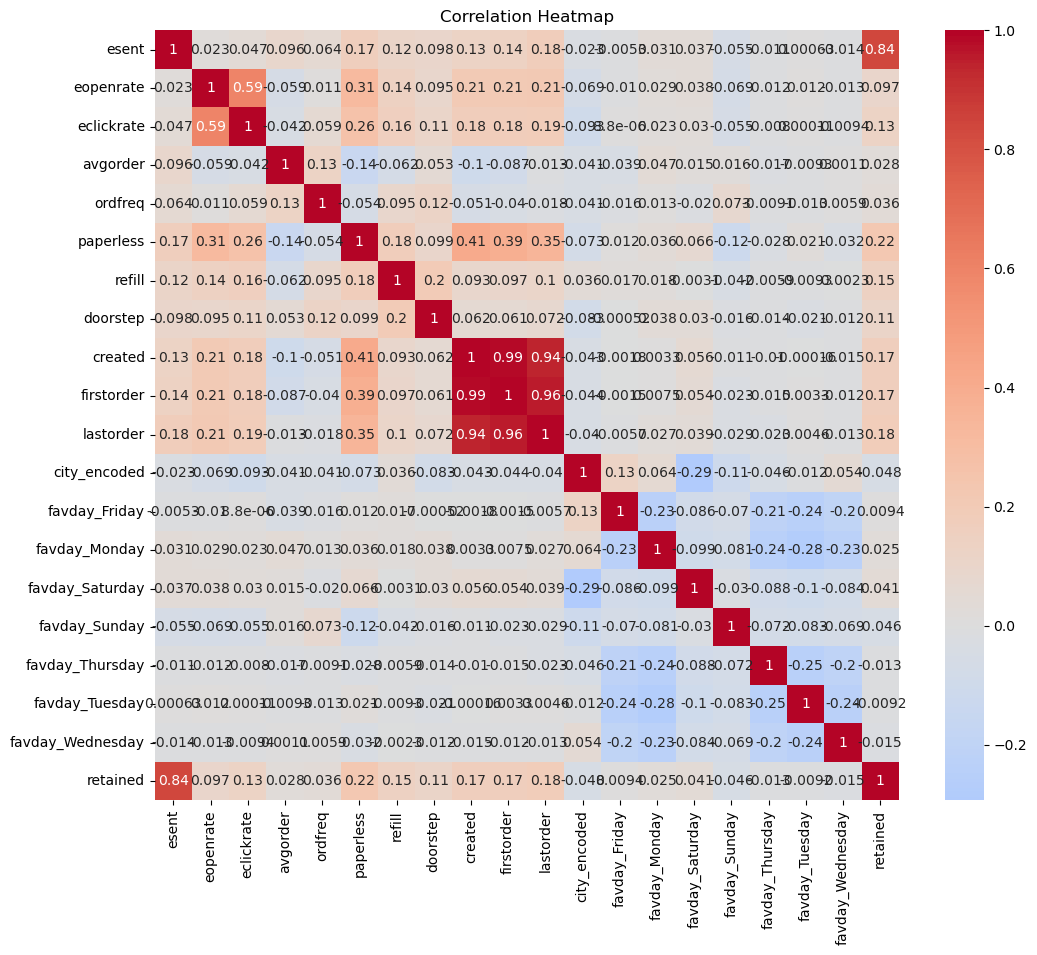

In [1065]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [1066]:
#GINI IMPORTANCE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [1067]:
# Define column names based on the information provided
column_names = [
    'esent', 'eopenrate', 'eclickrate', 'avgorder', 'ordfreq',
    'paperless', 'refill', 'doorstep', 'created', 'firstorder',
    'lastorder', 'city_encoded', 'favday_Friday', 'favday_Monday',
    'favday_Saturday', 'favday_Sunday', 'favday_Thursday',
    'favday_Tuesday', 'favday_Wednesday'
]

In [1068]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, Y_train)


RandomForestClassifier(random_state=42)

In [1069]:
# Calculate Gini importance
gini_importance = rf_classifier.feature_importances_

# Create a DataFrame with feature names and their Gini importance scores
gini_importance_df = pd.DataFrame({
    'Feature': column_names,
    'Gini_Importance': gini_importance
})


In [1070]:
# Sort the DataFrame by Gini importance in descending order
gini_importance_df = gini_importance_df.sort_values(by='Gini_Importance', ascending=False)


In [1071]:
print(gini_importance_df)

             Feature  Gini_Importance
0              esent         0.603682
1          eopenrate         0.100167
2         eclickrate         0.076719
9         firstorder         0.054597
10         lastorder         0.046450
8            created         0.046000
3           avgorder         0.017876
11      city_encoded         0.017716
5          paperless         0.009734
4            ordfreq         0.009680
6             refill         0.003807
17    favday_Tuesday         0.002195
13     favday_Monday         0.002054
12     favday_Friday         0.002043
18  favday_Wednesday         0.001998
16   favday_Thursday         0.001956
7           doorstep         0.001933
14   favday_Saturday         0.000869
15     favday_Sunday         0.000524


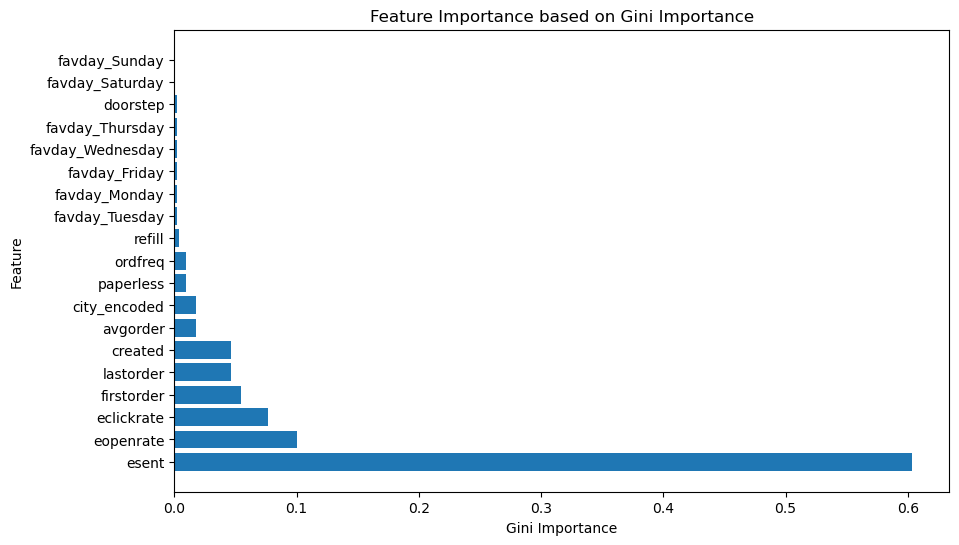

In [1072]:
# Visualize Gini importance
plt.figure(figsize=(10, 6))
plt.barh(gini_importance_df['Feature'], gini_importance_df['Gini_Importance'])
plt.xlabel('Gini Importance')
plt.ylabel('Feature')
plt.title('Feature Importance based on Gini Importance')
plt.show()

In [1073]:
# Select Top N Features
top_n = 10  # Set the number of top features you want to select
top_features = gini_importance_df['Feature'][:top_n]

# Print the top N features
print("Top", top_n, "Features:", top_features.tolist())

Top 10 Features: ['esent', 'eopenrate', 'eclickrate', 'firstorder', 'lastorder', 'created', 'avgorder', 'city_encoded', 'paperless', 'ordfreq']


In [1074]:
# Selected feature names
top_features = ['esent', 'eopenrate', 'eclickrate', 'firstorder', 'lastorder',
                     'created', 'city_encoded', 'avgorder', 'ordfreq', 'paperless']



In [1075]:
# Convert X_train and X_test to DataFrames
X_train_df = pd.DataFrame(X_train, columns=column_names)
X_test_df = pd.DataFrame(X_test, columns=column_names)


In [1076]:
# Selecting only the top 10 features from the original datasets
X_trainset = X_train_df[top_features].values
X_testset = X_test_df[top_features].values

# Print the shapes of the new datasets
print("Shape of X_trainset:", X_trainset.shape)
print("Shape of X_testset:", X_testset.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_trainset: (38960, 10)
Shape of X_testset: (6161, 10)
Shape of Y_train: (38960,)
Shape of Y_test: (6161,)


Machine and Deep Learning Models


1. Logistic Regression

In [1077]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# Assuming you have X_trainset, X_testset, Y_train, and Y_test

# Initialize the Logistic Regression model
logistic_regression = LogisticRegression(random_state=42)

# Fit the model on the training data
logistic_regression.fit(X_trainset, Y_train)

# Make predictions on the test data
y_pred_logistic = logistic_regression.predict(X_testset)

In [1078]:
# Calculate evaluation metrics
accuracy_lr = accuracy_score(Y_test, y_pred_logistic)
precision_lr = precision_score(Y_test, y_pred_logistic)
recall_lr = recall_score(Y_test, y_pred_logistic)
f1_lr = f1_score(Y_test, y_pred_logistic)
roc_auc_lr = roc_auc_score(Y_test, y_pred_logistic)

In [1079]:
# Print the evaluation metrics rounded to 4 decimal places
print("Logistic Regression:")
print("Accuracy:", round(accuracy_lr, 4))
print("Precision:", round(precision_lr, 4))
print("Recall:", round(recall_lr, 4))
print("F1-Score:", round(f1_lr, 4))
print("ROC-AUC:", round(roc_auc_lr, 4))

Logistic Regression:
Accuracy: 0.8883
Precision: 0.9709
Recall: 0.884
F1-Score: 0.9254
ROC-AUC: 0.894


2. Random Forest

In [1080]:
from sklearn.ensemble import RandomForestClassifier

# Define your hyperparameters
n_estimators = 200  # Number of trees in the forest
max_depth = 10      # Maximum depth of each tree
min_samples_split = 2  # Minimum samples required to split a node
min_samples_leaf = 1   # Minimum samples required at each leaf node

# Create the RFC instance with specified hyperparameters
rfc = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    random_state=42  # You can specify a random seed for reproducibility
)




In [1099]:
# Fit the RFC to your training data
rfc.fit(X_trainset, Y_train)

# Make predictions and evaluate the model
Y_pred = rfc.predict(X_testset)
# Perform evaluation (accuracy, precision, recall, F1, ROC-AUC, etc.

In [1100]:
# Calculate evaluation metrics
accuracy_rf = accuracy_score(Y_test, y_pred_rf)
precision_rf = precision_score(Y_test, y_pred_rf)
recall_rf = recall_score(Y_test, y_pred_rf)
f1_rf = f1_score(Y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(Y_test, y_pred_rf)

In [1101]:
# Print the evaluation metrics rounded to 4 decimal places
print("Random Forest Classifier:")
print("Accuracy:", round(accuracy_rf, 4))
print("Precision:", round(precision_rf, 4))
print("Recall:", round(recall_rf, 4))
print("F1-Score:", round(f1_rf, 4))
print("ROC-AUC:", round(roc_auc_rf, 4))

Random Forest Classifier:
Accuracy: 0.9638
Precision: 0.9766
Recall: 0.9772
F1-Score: 0.9769
ROC-AUC: 0.9463


SVM

In [1085]:
# Create an SVM classifier with manually chosen hyperparameters
svm_classifier = SVC(kernel='linear', C=1.0, gamma='scale', probability=True)

In [1086]:
# Train the classifier on the training data
svm_classifier.fit(X_trainset, Y_train)

# Make predictions on the test data
Y_pred_svm = svm_classifier.predict(X_testset)

In [1087]:
from sklearn.svm import SVC

#From have X_trainset, X_testset, Y_train, and Y_test

# Initialize the Support Vector Machine model
svm_classifier = SVC(random_state=42)

# Fit the model on the training data
svm_classifier.fit(X_trainset, Y_train)

# Make predictions on the test data
y_pred_svm = svm_classifier.predict(X_testset)

In [1088]:
# Calculate evaluation metrics
accuracy_svm = accuracy_score(Y_test, y_pred_svm)
precision_svm = precision_score(Y_test, y_pred_svm)
recall_svm = recall_score(Y_test, y_pred_svm)
f1_svm = f1_score(Y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(Y_test, y_pred_svm)

In [1089]:
# Print the evaluation metrics rounded to 4 decimal places
print("Support Vector Machine:")
print("Accuracy:", round(accuracy_svm, 4))
print("Precision:", round(precision_svm, 4))
print("Recall:", round(recall_svm, 4))
print("F1-Score:", round(f1_svm, 4))
print("ROC-AUC:", round(roc_auc_svm, 4))


Support Vector Machine:
Accuracy: 0.9322
Precision: 0.9699
Recall: 0.9426
F1-Score: 0.9561
ROC-AUC: 0.9185


XGBOOST

In [1090]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [1091]:
params = {
    'n_estimators': 100,       # Number of boosting rounds
    'max_depth': 6,           # Maximum depth of a tree
    'learning_rate': 0.1,     # Learning rate (eta)
    'subsample': 0.8,         # Fraction of samples used for boosting
    'colsample_bytree': 0.8,  # Fraction of features used for building trees
    'objective': 'binary:logistic',  # Binary classification
    'random_state': 42
}

In [1092]:
 #Assuming X_trainset, X_testset, Y_train, and Y_test
    
# Initialize the XGBoost classifier with your hyperparameters
xgboost_classifier = XGBClassifier(**params)


# Initialize the XGBoost classifier
#xgboost_classifier = XGBClassifier(random_state=42)

In [1093]:
# Fit the model on the training data
xgboost_classifier.fit(X_trainset, Y_train)

# Make predictions on the test data
y_pred_xgboost = xgboost_classifier.predict(X_testset)

In [1094]:
# Calculate evaluation metrics
accuracy_xgboost = accuracy_score(Y_test, y_pred_xgboost)
precision_xgboost = precision_score(Y_test, y_pred_xgboost)
recall_xgboost = recall_score(Y_test, y_pred_xgboost)
f1_xgboost = f1_score(Y_test, y_pred_xgboost)
roc_auc_xgboost = roc_auc_score(Y_test, y_pred_xgboost)

In [965]:
# Print the evaluation metrics rounded to 4 decimal places
print("XGBOOST:")
print("Accuracy:", round(accuracy_xgboost, 4))
print("Precision:", round(precision_xgboost, 4))
print("Recall:", round(recall_xgboost, 4))
print("F1-Score:", round(f1_xgboost, 4))
print("ROC-AUC:", round(roc_auc_xgboost, 4))

XGBOOST:
Accuracy: 0.9633
Precision: 0.976
Recall: 0.9772
F1-Score: 0.9766
ROC-AUC: 0.9452


 HYBRID MODEL

In [990]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialize the base models
rfc_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
xgboost_classifier = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)

# Train the base models on the training data
rfc_classifier.fit(X_trainset, Y_train)
xgboost_classifier.fit(X_trainset, Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [991]:
rfc_predictions = rfc_classifier.predict_proba(X_testset)[:, 1]
xgboost_predictions = xgboost_classifier.predict_proba(X_testset)[:, 1]


In [992]:
import numpy as np

# Combine the stacking features with the original features
stacked_features = np.column_stack((X_testset, rfc_predictions, xgboost_predictions))


In [672]:
# Create base models
base_models = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgboost', XGBClassifier(random_state=42))
]

# Create a stacking ensemble with MLP as the final estimator
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
)



In [676]:
# Fit the stacking model on the training data
stacking_model.fit(X_trainset, Y_train)

# Make predictions using the stacking model
y_pred_stacking = stacking_model.predict(X_testset)


In [678]:
# Assuming you have y_true and y_pred_stacking
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
precision_stacking = precision_score(y_test, y_pred_stacking)
recall_stacking = recall_score(y_test, y_pred_stacking)
f1_stacking = f1_score(y_test, y_pred_stacking)
roc_auc_stacking = roc_auc_score(y_test, y_pred_stacking)

# Print the evaluation metrics rounded to 4 decimal places
print("Hybrid of RF and XGBoost with MLP final estimator:")
print("Accuracy:", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1-Score:", round(f1, 4))
print("ROC-AUC:", round(roc_auc, 4))

Hybrid of RF and XGBoost with MLP final estimator:
Accuracy: 0.9636
Precision: 0.9798
Recall: 0.9737
F1-Score: 0.9767
ROC-AUC: 0.9505


LSTM

In [679]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [680]:
# X_trainset, X_testset, Y_train, and Y_test

# Reshape the data to fit LSTM input shape (samples, time steps, features)
#X_train_reshaped = np.reshape(X_trainset, (X_trainset.shape[0], 1, X_trainset.shape[1]))
#X_test_reshaped = np.reshape(X_testset, (X_testset.shape[0], 1, X_testset.shape[1]))

# Reshape X_trainset and X_testset to be 3D for LSTM input
X_trainset_3d = X_trainset.reshape((X_trainset.shape[0], 1, X_trainset.shape[1]))
X_testset_3d = X_testset.reshape((X_testset.shape[0], 1, X_testset.shape[1]))

# Initialize the LSTM model
lstm_model = Sequential()

In [681]:
# Add the first LSTM layer
lstm_model.add(LSTM(units=64, activation='relu', input_shape=(1, X_trainset.shape[1]), return_sequences=True))

# Add the second LSTM layer
lstm_model.add(LSTM(units=128, activation='relu'))

In [682]:
# Add the output layer
lstm_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [683]:
# Fit the model on the training data
lstm_model.fit(X_trainset_3d, Y_train, epochs=10, batch_size=32)

# Make predictions on the test data
# Make predictions on the test data
y_pred_probs = lstm_model.predict(X_testset_3d)
y_pred_lstm = (y_pred_probs > 0.5).astype(int)


Epoch 1/10
1218/1218 [==============================] - 21s 6ms/step - loss: 0.2551 - accuracy: 0.8945
Epoch 2/10
1218/1218 [==============================] - 7s 6ms/step - loss: 0.2056 - accuracy: 0.9120
Epoch 3/10
1218/1218 [==============================] - 7s 6ms/step - loss: 0.1913 - accuracy: 0.9202
Epoch 4/10
1218/1218 [==============================] - 7s 6ms/step - loss: 0.1849 - accuracy: 0.9233
Epoch 5/10
1218/1218 [==============================] - 7s 6ms/step - loss: 0.1782 - accuracy: 0.9261
Epoch 6/10
1218/1218 [==============================] - 7s 6ms/step - loss: 0.1733 - accuracy: 0.9285
Epoch 7/10
1218/1218 [==============================] - 7s 6ms/step - loss: 0.1687 - accuracy: 0.9309
Epoch 8/10
1218/1218 [==============================] - 7s 6ms/step - loss: 0.1646 - accuracy: 0.9321
Epoch 9/10
1218/1218 [==============================] - 7s 6ms/step - loss: 0.1610 - accuracy: 0.9336
Epoch 10/10
193/193 [==============================] - 1s 3ms/step


In [684]:
# Calculate evaluation metrics
accuracy_lstm = accuracy_score(Y_test, y_pred_lstm)
precision_lstm = precision_score(Y_test, y_pred_lstm)
recall_lstm = recall_score(Y_test, y_pred_lstm)
f1_lstm = f1_score(Y_test, y_pred_lstm)
roc_auc = roc_auc_score(Y_test, y_pred_lstm)

In [685]:
# Print the evaluation metrics rounded to 4 decimal places
print("LSTM:")
print("Accuracy:", round(accuracy_lstm, 4))
print("Precision:", round(precision_lstm, 4))
print("Recall:", round(recall_lstm, 4))
print("F1-Score:", round(f1_lstm, 4))
print("ROC-AUC:", round(roc_auc, 4))

LSTM:
Accuracy: 0.9354
Precision: 0.9665
Recall: 0.9505
F1-Score: 0.9584
ROC-AUC: 0.9157


CNN

In [686]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [687]:
# Assuming you have X_trainset, X_testset, Y_train, and Y_test

# Reshape the data to fit CNN input shape (samples, timesteps, features)
X_train_reshaped = np.reshape(X_trainset, (X_trainset.shape[0], X_trainset.shape[1], 1))
X_test_reshaped = np.reshape(X_testset, (X_testset.shape[0], X_testset.shape[1], 1))

# Initialize the CNN model
cnn_model = Sequential()

In [688]:
# Add the first convolutional layer
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_trainset.shape[1], 1)))

# Add the max pooling layer
cnn_model.add(MaxPooling1D(pool_size=2))

In [689]:
# Add the second convolutional layer
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))

# Add another max pooling layer
cnn_model.add(MaxPooling1D(pool_size=2))

In [690]:
# Flatten the output for the fully connected layers
cnn_model.add(Flatten())

In [691]:
# Add a fully connected hidden layer
cnn_model.add(Dense(units=50, activation='relu'))

In [692]:
# Add the output layer
cnn_model.add(Dense(units=1, activation='sigmoid'))

In [693]:
# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model on the training data
cnn_model.fit(X_train_reshaped, Y_train, epochs=10, batch_size=32)



Epoch 1/10
1218/1218 [==============================] - 6s 4ms/step - loss: 0.2542 - accuracy: 0.8925
Epoch 2/10
1218/1218 [==============================] - 4s 4ms/step - loss: 0.1969 - accuracy: 0.9195
Epoch 3/10
1218/1218 [==============================] - 4s 3ms/step - loss: 0.1869 - accuracy: 0.9238
Epoch 4/10
1218/1218 [==============================] - 4s 3ms/step - loss: 0.1776 - accuracy: 0.9279
Epoch 5/10
1218/1218 [==============================] - 4s 4ms/step - loss: 0.1712 - accuracy: 0.9301
Epoch 6/10
1218/1218 [==============================] - 4s 3ms/step - loss: 0.1645 - accuracy: 0.9321
Epoch 7/10
1218/1218 [==============================] - 4s 4ms/step - loss: 0.1600 - accuracy: 0.9340
Epoch 8/10
1218/1218 [==============================] - 4s 4ms/step - loss: 0.1565 - accuracy: 0.9360
Epoch 9/10
1218/1218 [==============================] - 4s 4ms/step - loss: 0.1527 - accuracy: 0.9384
Epoch 10/10
1218/1218 [==============================] - 4s 4ms/step - loss: 0.150

In [694]:
# Make predictions on the test data
y_pred_cnn = cnn_model.predict(X_test_reshaped)

193/193 [==============================] - 1s 2ms/step


In [695]:
# Convert probabilities to binary predictions using a threshold
y_pred_cnn_binary = (y_pred_cnn > 0.5).astype(int)


In [696]:
# Calculate evaluation metrics
accuracy_cnn = accuracy_score(Y_test, y_pred_cnn_binary)
precision_cnn = precision_score(Y_test, y_pred_cnn_binary)
recall_cnn = recall_score(Y_test, y_pred_cnn_binary)
f1_cnn = f1_score(Y_test, y_pred_cnn_binary)
roc_auc = roc_auc_score(Y_test, y_pred_cnn_binary)

In [697]:
# Print the evaluation metrics rounded to 4 decimal places
print("CNN:")
print("Accuracy:", round(accuracy_cnn, 4))
print("Precision:", round(precision_cnn, 4))
print("Recall:", round(recall_cnn, 4))
print("F1-Score:", round(f1_cnn, 4))
print("ROC-AUC:", round(roc_auc, 4))

CNN:
Accuracy: 0.946
Precision: 0.9603
Recall: 0.9712
F1-Score: 0.9657
ROC-AUC: 0.9129


TRANSFORMERS MODEL

In [738]:
import numpy as np
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from keras_self_attention import SeqSelfAttention
from keras.layers import Layer
import keras.backend as K

In [739]:
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        input_shape = tuple(input_shape)  # Convert TensorShape to a tuple
        self.W = self.add_weight(name='W',
                                 shape=(input_shape[-1], 1),
                                 initializer='uniform',
                                 trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, x):
        eij = K.dot(x, self.W)
        ai = K.softmax(eij, axis=1)
        return x * ai

    def compute_output_shape(self, input_shape):
        return input_shape

In [740]:
# Reshape the input data to have a time step dimension
X_trainset_reshaped = X_trainset[:, :, None]

In [741]:
# Build the transformer-based model
def build_transformer_model(input_shape):
    inputs = Input(shape=input_shape)
    x = SeqSelfAttention(attention_activation='sigmoid')(inputs)
    x = GlobalAveragePooling1D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [742]:
# Assuming X_trainset_reshaped.shape[1:] is the input shape
model = build_transformer_model(input_shape=X_trainset_reshaped.shape[1:])
model.summary()

C:\Users\HP\anaconda3\lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 seq_self_attention_1 (SeqS  (None, 10, 1)             129       
 elfAttention)                                                   
                                                                 
 global_average_pooling1d_1  (None, 1)                 0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_24 (Dense)            (None, 128)               256       
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 1)                 129 

In [743]:
X_testset_reshaped = X_testset[:, :, None]

In [744]:
# Assuming X_testset_reshaped contains your test data in the reshaped format
predictions = model.predict(X_testset_reshaped)


# Convert the predictions to binary values (0 or 1) based on a threshold
threshold = 0.5  # Adjust the threshold as needed
binary_predictions = (predictions > threshold).astype(int)

193/193 [==============================] - 1s 4ms/step


In [745]:
threshold = 0.5
predicted_labels = (predictions > threshold).astype(int)

In [746]:
precision = precision_score(Y_test, predicted_labels, zero_division=1)

In [749]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


# Calculate evaluation metrics
precision_transformers = precision_score(Y_test, predicted_labels, zero_division=1)
recall_transformers = recall_score(Y_test, predicted_labels)
accuracy_transformers = accuracy_score(Y_test, predicted_labels)
f1_transformers = f1_score(Y_test, predicted_labels)
roc_auc = roc_auc_score(Y_test, predicted_labels)

In [750]:
print("Transformers Model:")
print("Precision:", round(precision_transformers, 4))
print("Recall:", round(recall_transformers, 4))
print("Accuracy:", round(accuracy_transformers, 4))
print("F1 Score:", round(f1_transformers, 4))
print("ROC-AUC:", round(roc_auc, 4))

Transformers Model:
Precision: 0.7833
Recall: 1.0
Accuracy: 0.7833
F1 Score: 0.8785
ROC-AUC: 0.5


CONFUSION MATRIX

In [698]:
from sklearn.metrics import confusion_matrix

In [699]:
# 1. Logistic Regression
y_pred_lr = logistic_regression.predict(X_testset)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

In [700]:
# 2. Random Forest Classifier
y_pred_rfc = random_forest.predict(X_testset)
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)

In [701]:
# 3. Support Vector Machine
y_pred_svm = svm_classifier.predict(X_testset)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

In [702]:
# 4. XGBoost
cm_xgboost = confusion_matrix(Y_test, y_pred_xgboost)

In [704]:
# 6. LSTM

cm_lstm = confusion_matrix(Y_test, y_pred_lstm)


In [705]:
# 7. CNN

# Compute the confusion matrix
cm_cnn = confusion_matrix(Y_test, y_pred_cnn_binary)

In [721]:
#8. Hybrid of RFC, XBOOST AND MLP
conf_matrix_hybrid = confusion_matrix(y_test, y_pred_stacking)


In [751]:
# 8. Transformers
cm_transformers = confusion_matrix(Y_test, predicted_labels)

In [764]:
# Print the confusion matrices
print("Confusion Matrix for LR:")
print(conf_matrix_lr)

print("\nConfusion Matrix for RFC:")
print(conf_matrix_rfc)

print("\nConfusion Matrix for SVM:")
print(conf_matrix_svm)

print("\nConfusion Matrix for XGBoost:")
print(cm_xgboost)

print("\nConfusion Matrix for LSTM:")
print(cm_lstm)

print("\nConfusion Matrix for CNN:")
print(cm_cnn)

print("\nConfusion Matrix for Hybrid")
print(conf_matrix_hybrid)

print("\nConfusion Matrix for Transformers:")
print(cm_transformers)

Confusion Matrix for LR:
[[1207  128]
 [ 560 4266]]

Confusion Matrix for RFC:
[[1222  113]
 [ 110 4716]]

Confusion Matrix for SVM:
[[1194  141]
 [ 277 4549]]

Confusion Matrix for XGBoost:
[[1200  135]
 [  90 4736]]

Confusion Matrix for LSTM:
[[1176  159]
 [ 239 4587]]

Confusion Matrix for CNN:
[[1141  194]
 [ 139 4687]]

Confusion Matrix for Hybrid
[[1238   97]
 [ 127 4699]]

Confusion Matrix for Transformers:
[[   0 1335]
 [   0 4826]]


In [753]:
import seaborn as sns
import matplotlib.pyplot as plt

# conf_matrix_lr, conf_matrix_rfc, conf_matrix_svm, cm_xgboost,
# cm_hybrid, cm_lstm, cm_cnn, and cm_transformers

# Create a list of confusion matrices and their corresponding model names
confusion_matrices = [conf_matrix_lr, conf_matrix_rfc, conf_matrix_svm,
                      cm_xgboost,conf_matrix_hybrid, cm_lstm, cm_cnn, cm_transformers]
model_names = ["LR", "RFC", "SVM", "XGBoost", "Hybrid_MLP", "LSTM", "CNN", "Transformers"]


In [754]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have defined the list of confusion matrices and model names
confusion_matrices = [conf_matrix_lr, conf_matrix_rfc, conf_matrix_svm,
                      cm_xgboost, conf_matrix_hybrid, cm_lstm, cm_cnn, cm_transformers]
model_names = ["LR", "RFC", "SVM", "XGBoost", "Hybrid_MLP", "LSTM", "CNN", "Transformers"]


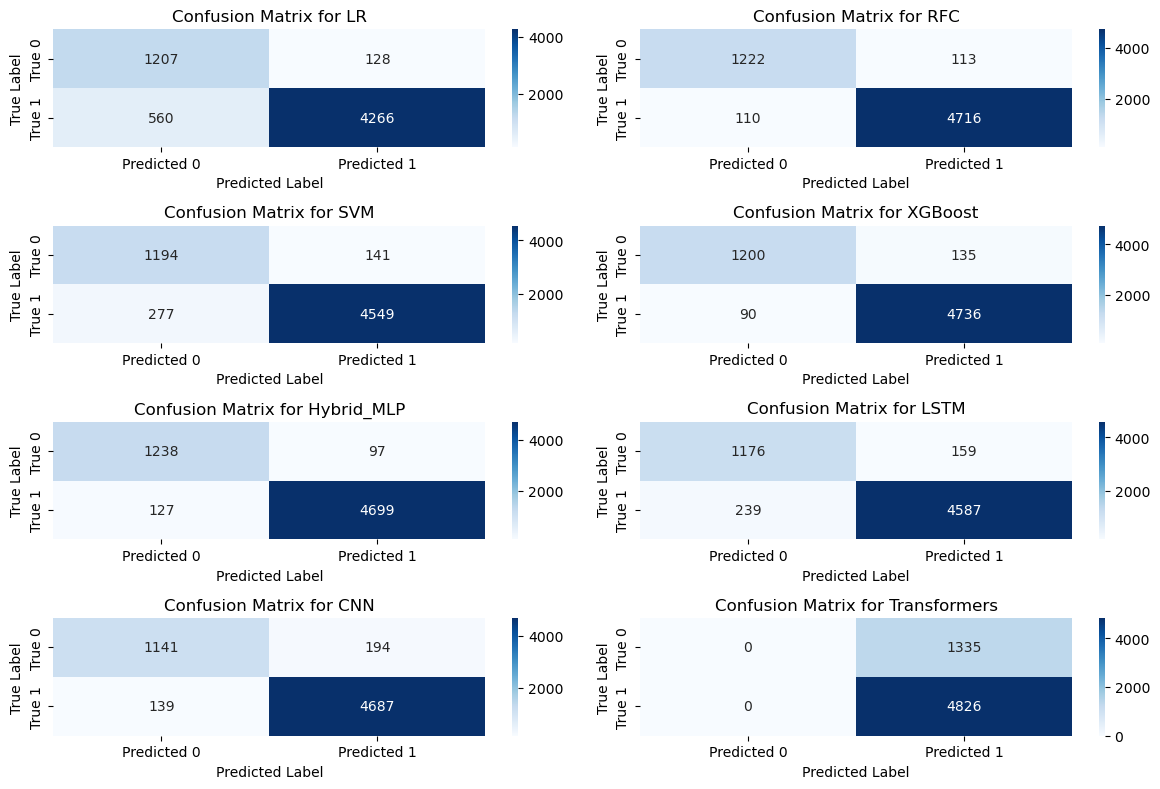

In [755]:
# Plot the confusion matrices using subplots
num_models = len(confusion_matrices)
num_columns = 2  # Number of columns in the subplot grid
num_rows = (num_models + num_columns - 1) // num_columns

plt.figure(figsize=(12, 8))

for i in range(num_models):
    plt.subplot(num_rows, num_columns, i + 1)
    sns.heatmap(confusion_matrices[i], annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['True 0', 'True 1'])
    plt.title(f"Confusion Matrix for {model_names[i]}")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plt.tight_layout()
plt.show()

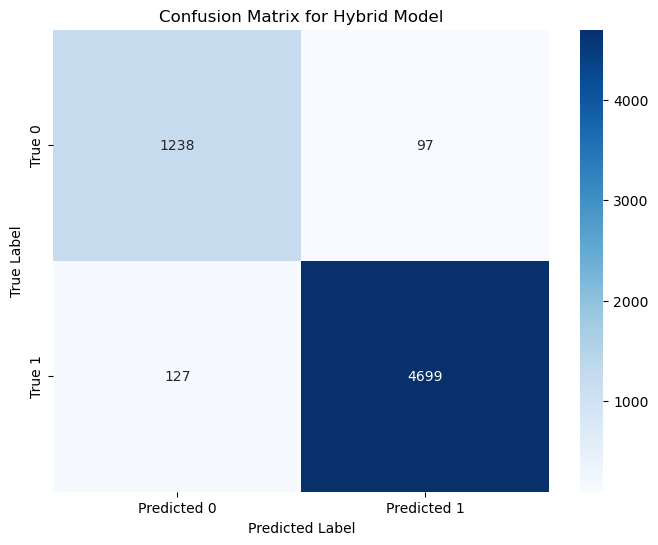

In [737]:
# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_hybrid, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['True 0', 'True 1'])
plt.title("Confusion Matrix for Hybrid Model")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

ROC CURVE

In [756]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# predicted probabilities for all models: prob_lr, prob_rfc, prob_svm,
# prob_xgboost, prob_hybrid, prob_lstm, prob_cnn, prob_transformers

# Create a list of predicted probabilities and their corresponding model names
probs = [y_pred_lr, y_pred_rfc, y_pred_svm, y_pred_xgboost,
         y_pred_stacking, y_pred_lstm, y_pred_cnn_binary, predicted_labels]
model_names = ["LR", "RFC", "SVM", "XGBoost",
               "Hybrid", "LSTM", "CNN", "Transformers"]

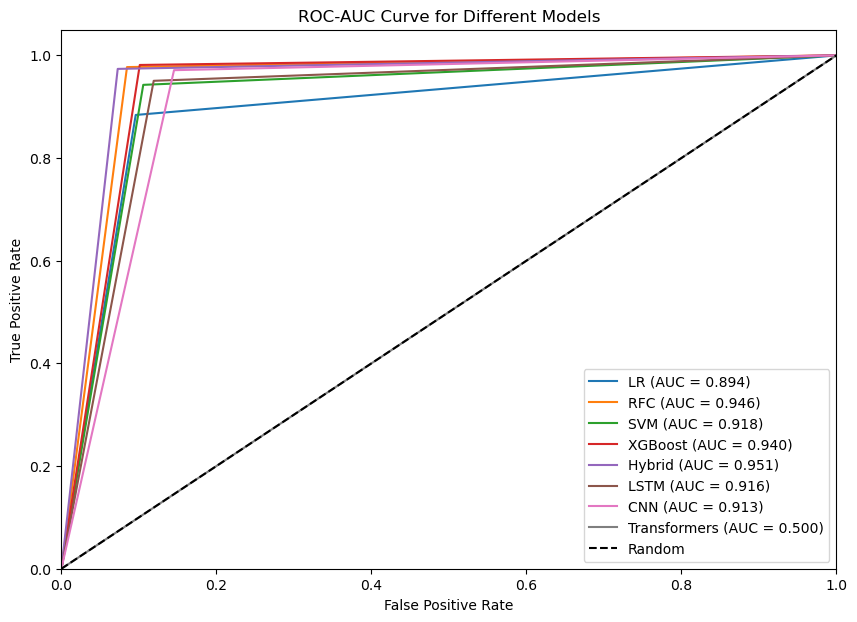

In [757]:
# Plot ROC-AUC curves for all models
plt.figure(figsize=(10, 7))
for prob, model_name in zip(probs, model_names):
    fpr, tpr, _ = roc_curve(Y_test, prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Different Models')
plt.legend(loc="lower right")
plt.show()


In [758]:
import matplotlib.pyplot as plt

# Assuming you have f1_scores for all models: f1_lr, f1_rfc, f1_svm,
# f1_xgboost, f1_hybrid, f1_lstm, f1_cnn, f1_transformers

# Create a list of F1 scores and their corresponding model names
f1_scores = [f1_lr, f1_rf, f1_svm, f1_xgboost,
             f1, f1_lstm, f1_cnn, f1_transformers]
model_names = ["LR", "RFC", "SVM", "XGBoost",
               "Hybrid", "LSTM", "CNN", "Tranformers"]

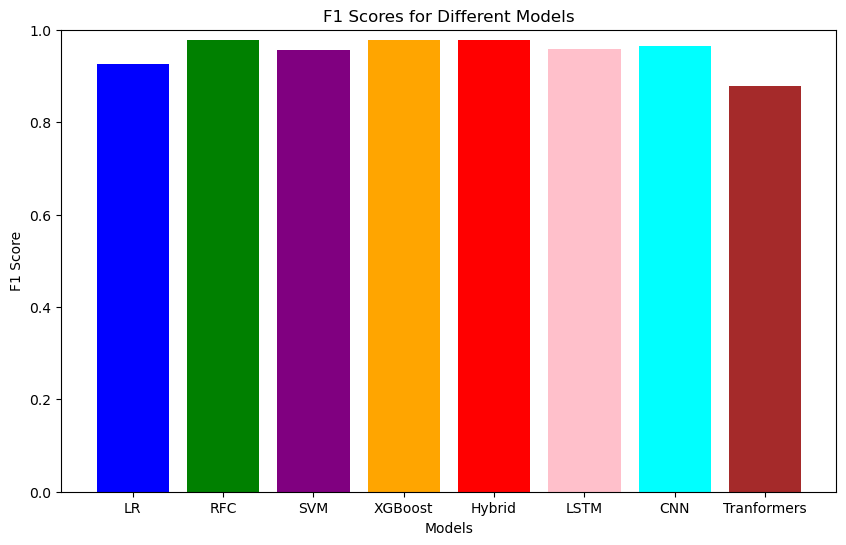

In [759]:
# Define a list of colors for each model
colors = ['blue', 'green', 'purple', 'orange', 'red', 'pink', 'cyan', 'brown']

# Plot F1 scores for all models with different colors
plt.figure(figsize=(10, 6))
plt.bar(model_names, f1_scores, color=colors)
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Different Models')
plt.ylim(0.0, 1.0)  # Adjust y-axis limits as needed
plt.show()

END
